<a href="https://colab.research.google.com/github/denbush03/data_analysis/blob/main/%D0%9F%D0%A1_%E2%84%963_%D0%91%D1%83%D1%88_%D0%9C%D0%9A%D0%98%D0%A131.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 3

## Ссылки


https://www.kaggle.com/c/stumbleupon

# Подключение библиотек


In [ ]:
!pip install transformers

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
import tensorflow as tf 



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 6.7 MB/s 
     |████████████████████████████████| 7.6 MB 30.8 MB/s 
     |████████████████████████████████| 163 kB 37.8 MB/s 


# Загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/Проектный семинар АДиМО/3/train.tsv',sep='\t')

df_test=pd.read_csv('/content/drive/MyDrive/Проектный семинар АДиМО/3/test.tsv',sep='\t',usecols=['urlid','boilerplate'])


# Исследование данных

Набор данных содержит 27 столбцов, и конечная цель - предсказать, является ли статья вечнозеленой или не вечнозеленой. <br>

In [ ]:
df_train.head()


,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,1,1,55,0,2240,258,11,0.166667,0.057613,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,...,1,0,24,0,2737,120,5,0.041667,0.100858,1
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,...,1,1,14,0,12032,162,10,0.098765,0.082569,0


In [ ]:
df_train.columns

Index(['url', 'urlid', 'boilerplate', 'alchemy_category',
       'alchemy_category_score', 'avglinksize', 'commonlinkratio_1',
       'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4',
       'compression_ratio', 'embed_ratio', 'framebased', 'frameTagRatio',
       'hasDomainLink', 'html_ratio', 'image_ratio', 'is_news',
       'lengthyLinkDomain', 'linkwordscore', 'news_front_page',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio', 'label'],
      dtype='object')

In [ ]:
df_train['alchemy_category'].value_counts()

?                     2342
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

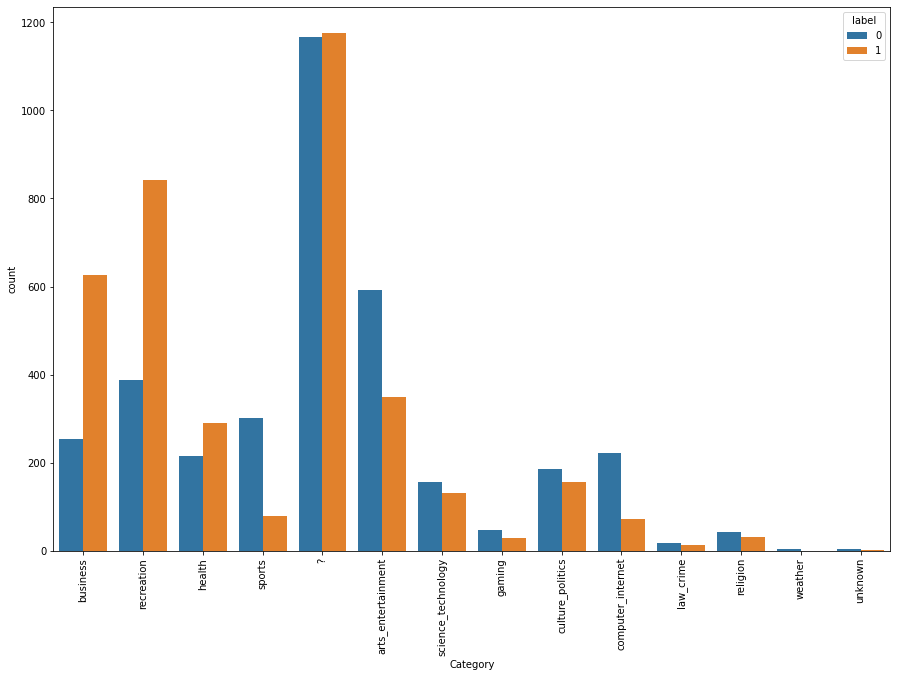

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x=df_train['alchemy_category'],hue=df_train['label']);
plt.xlabel('Category');
plt.xticks(rotation=90);

Категория "Алхимия" действительно играет определенную роль в определении label для article 

Мы видим, что бизнес, отдых и здоровье, скорее всего, будут вечнозелеными <br>

Где как спорт, компьютерный интернет, искусство и развлечения больше похожи на то, чтобы быть не вечнозелеными. <br>

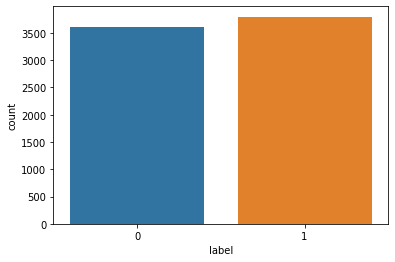

In [ ]:
sns.countplot(x=df_train['label'])
# Это сбалансированный набор данных

## Очистка шаблонного текста

Удалим заголовок и слово url из каждого описания. 
Мы также будем использовать слова в нижнем регистре, так как планируем использовать версию Transformer model без кавычек

In [ ]:
df_train['boilerplate'].replace(to_replace=r'"title":', value="",inplace=True,regex=True)
df_train['boilerplate'].replace(to_replace=r'"url":',value="",inplace=True,regex=True)

df_train['boilerplate'].replace(to_replace=r'{|}',value="",inplace=True,regex=True)
df_train['boilerplate']=df_train['boilerplate'].str.lower()


#Очистка тестового фрейма данных 

df_test['boilerplate'].replace(to_replace=r'"title":', value="",inplace=True,regex=True)
df_test['boilerplate'].replace(to_replace=r'"url":',value="",inplace=True,regex=True)

df_test['boilerplate'].replace(to_replace=r'{|}',value="",inplace=True,regex=True)
df_test['boilerplate']=df_test['boilerplate'].str.lower()

# Загрузка модели доверенного лица для точности постороений

In [ ]:
from transformers import AutoTokenizer, TFAutoModel


#Загрузка токенизатора и модели Берта для точной настройки

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
bert=TFAutoModel.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
#ДОБАВЬТЕ все переменные для модели трансформатора

SEQ_length=512

#Создадим матрицы X и Y из набора train Df

Xids=np.zeros((df_train.shape[0],SEQ_length))
Xmask=np.zeros((df_train.shape[0],SEQ_length))
y=np.zeros((df_train.shape[0],1))

#Подготовка тестового фрейма данных

Xids_test=np.zeros((df_test.shape[0],SEQ_length))
Xmask_test=np.zeros((df_test.shape[0],SEQ_length))


In [ ]:
for i,sequence in enumerate(df_train['boilerplate']):
    tokens=tokenizer.encode_plus(sequence,max_length=SEQ_length,padding='max_length',add_special_tokens=True,
                           truncation=True,return_token_type_ids=False,return_attention_mask=True,
                           return_tensors='tf')
    
    Xids[i,:],Xmask[i,:],y[i,0]=tokens['input_ids'],tokens['attention_mask'],df_train.loc[i,'label']
    

for i,sequence in enumerate(df_test['boilerplate']):
    tokens=tokenizer.encode_plus(sequence,max_length=SEQ_length,padding='max_length',add_special_tokens=True,
                           truncation=True,return_token_type_ids=False,return_attention_mask=True,
                           return_tensors='tf')
    
    Xids_test[i,:],Xmask_test[i,:]=tokens['input_ids'],tokens['attention_mask']

In [ ]:
#Проверка, доступен ли графический процессор
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
dataset=tf.data.Dataset.from_tensor_slices((Xids,Xmask,y))

def map_func(input_ids,mask,labels):
    return {'input_ids':input_ids,'attention_mask':mask},labels

dataset=dataset.map(map_func)
dataset=dataset.shuffle(100000).batch(32).prefetch(1000)

DS_size=len(list(dataset))

train=dataset.take(round(DS_size*0.85))
val=dataset.skip(round(DS_size*0.85))

In [ ]:
#Подготовка тестового набора данных

dataset_test=tf.data.Dataset.from_tensor_slices((Xids_test,Xmask_test))

def map_func(input_ids,mask):
    return {'input_ids':input_ids,'attention_mask':mask}

dataset_test=dataset_test.map(map_func)
dataset_test=dataset_test.batch(32).prefetch(1000)

# Построение модели


In [ ]:
input_ids=tf.keras.layers.Input(shape=(SEQ_length,),name='input_ids',dtype='int32')
input_mask=tf.keras.layers.Input(shape=(SEQ_length,),name='attention_mask',dtype='int32')

embedding=bert(input_ids,attention_mask=input_mask)[0]
x=tf.keras.layers.GlobalAveragePooling1D()(embedding)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Dense(128,activation='relu')(x)
x=tf.keras.layers.Dropout(0.3)(x)
x=tf.keras.layers.Dense(64,activation='relu')(x)
output=tf.keras.layers.Dense(1,activation='sigmoid')(x)


model=tf.keras.Model(inputs=[input_ids,input_mask],outputs=output)

model.layers[2].trainable=False

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 512)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 512)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 512,                                           

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='adam',metrics=[tf.keras.metrics.AUC()])

In [ ]:
history=model.fit(train,validation_data=val,epochs=20)# 20 эпох

Epoch 1/20
 97/197 [=============>................] - ETA: 2:02:34 - loss: 0.4933 - auc: 0.8498

# Prediction 

In [ ]:
predictions=model.predict(dataset_test)

In [ ]:
df_test['label']=predictions

df_test.to_csv('Bush_submission.csv',columns=['urlid','label'],index=False)

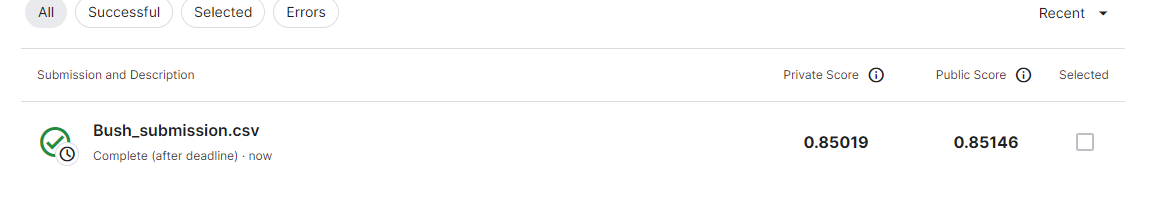